# HIỂN THỊ DANH SÁCH CÁC ẢNH CỦA TẬP DỮ LIỆU
##_Author_: **Nguyễn Phạm Thanh Phong - 21522458**

## Chuẩn bị load data & import

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

## define hàm để đọc ImagePath & Category như trong bài tập Train-Test split trước đó

In [ ]:

def load_image_dirs_to_df(base_dir='./',folders=[]):
  # Collect image paths and labels
  data = []
  for label in folders:
      folder_path = os.path.join(base_dir, label)
      for image_name in os.listdir(folder_path):
          image_path = os.path.join(label, image_name)
          data.append((image_path, label))

  # Create DataFrame
  df = pd.DataFrame(data, columns=['ImageFullPath', 'CategoryID'])
  return df


In [ ]:
folders = ['Others','Honda','Suzuki','Yamaha','VinFast']
base_dir='drive/MyDrive/my_shared_shortcut/Public'
df = load_image_dirs_to_df(base_dir=base_dir,folders=folders)
df.head()

,ImageFullPath,CategoryID
0,Others/22520896-22520926-22521627.Others.25.jpg,Others
1,Others/22520896-22520926-22521627.Others.47.jpg,Others
2,Others/22520896-22520926-22521627.Others.313.jpg,Others
3,Others/22520896-22520926-22521627.Others.361.jpg,Others
4,Others/22520896-22520926-22521627.Others.255.jpg,Others


## Kiểm tra xem load df['CategoryID'] đã đúng chưa

In [ ]:
df['CategoryID'].unique()

array(['Others', 'Honda', 'Suzuki', 'Yamaha', 'VinFast'], dtype=object)

## Define hàm để display image trên 1 dòng
## Mỗi lần là 10 instaces / dòng
## call 5 lần như thế
## Phía dưới sẽ plt.show() và có được 1 plot hoàn chỉnh 5 dòng 11 cột:
- 1 cột label
- 10 cột ảnh

In [ ]:

# Define the function to plot images for a category
def plot_images_for_category(category, images, row, fig, axes, num_samples_per_row=10, scale_factor=0.1, base_dir='./'):
    #Cell ảnh tại dòng row
    axes[row, 0].text(0.5, 0.5, category, fontsize=24, fontweight='bold', ha='left', va='center', transform=axes[row, 0].transAxes)
    axes[row, 0].axis('off')

    #loop qua 10 ảnh ngẫu nhiên
    #cho aspect là equal để = với 150 px đã scale trước đó
    #image được load từ base_dir + image_path (từ FullImagePath)
    for i, image_path in enumerate(random.sample(images, num_samples_per_row)):
        joined_image_path = os.path.join(base_dir, image_path)
        image = Image.open(joined_image_path)
        image = image.resize((150, 150))  # Resize images to 80x80
        axes[row, i + 1].imshow(image)
        axes[row, i + 1].axis('off')
        axes[row, i + 1].set_aspect('equal')
        axes[row, i + 1].set_xticks([])
        axes[row, i + 1].set_yticks([])

    ##Căn chỉnh cho cột label không bị đè (mở rộng nó ra thôi)
    left, bottom, width, height = axes[row, 0].get_position().bounds
    ## width là 0.2 => 0.2 inch * 100 = 200px cho cột label
    axes[row, 0].set_position([0.0, bottom, 0.2, height])
    # print(axes[row, 0].get_position().bounds)



## Gọi hàm để show ảnh
## Phía dưới là 1 plot hoàn chỉnh
## Đảm bảo 150px / ảnh
## Đảm bảo 10 ảnh/ dòng

drive/MyDrive/my_shared_shortcut/Public
(0.0, 0.7472413793103448, 0.2, 0.13275862068965516)
(0.0, 0.5879310344827586, 0.2, 0.13275862068965516)
(0.0, 0.4286206896551724, 0.2, 0.13275862068965516)
(0.0, 0.2693103448275862, 0.2, 0.13275862068965516)
(0.0, 0.10999999999999999, 0.2, 0.13275862068965516)


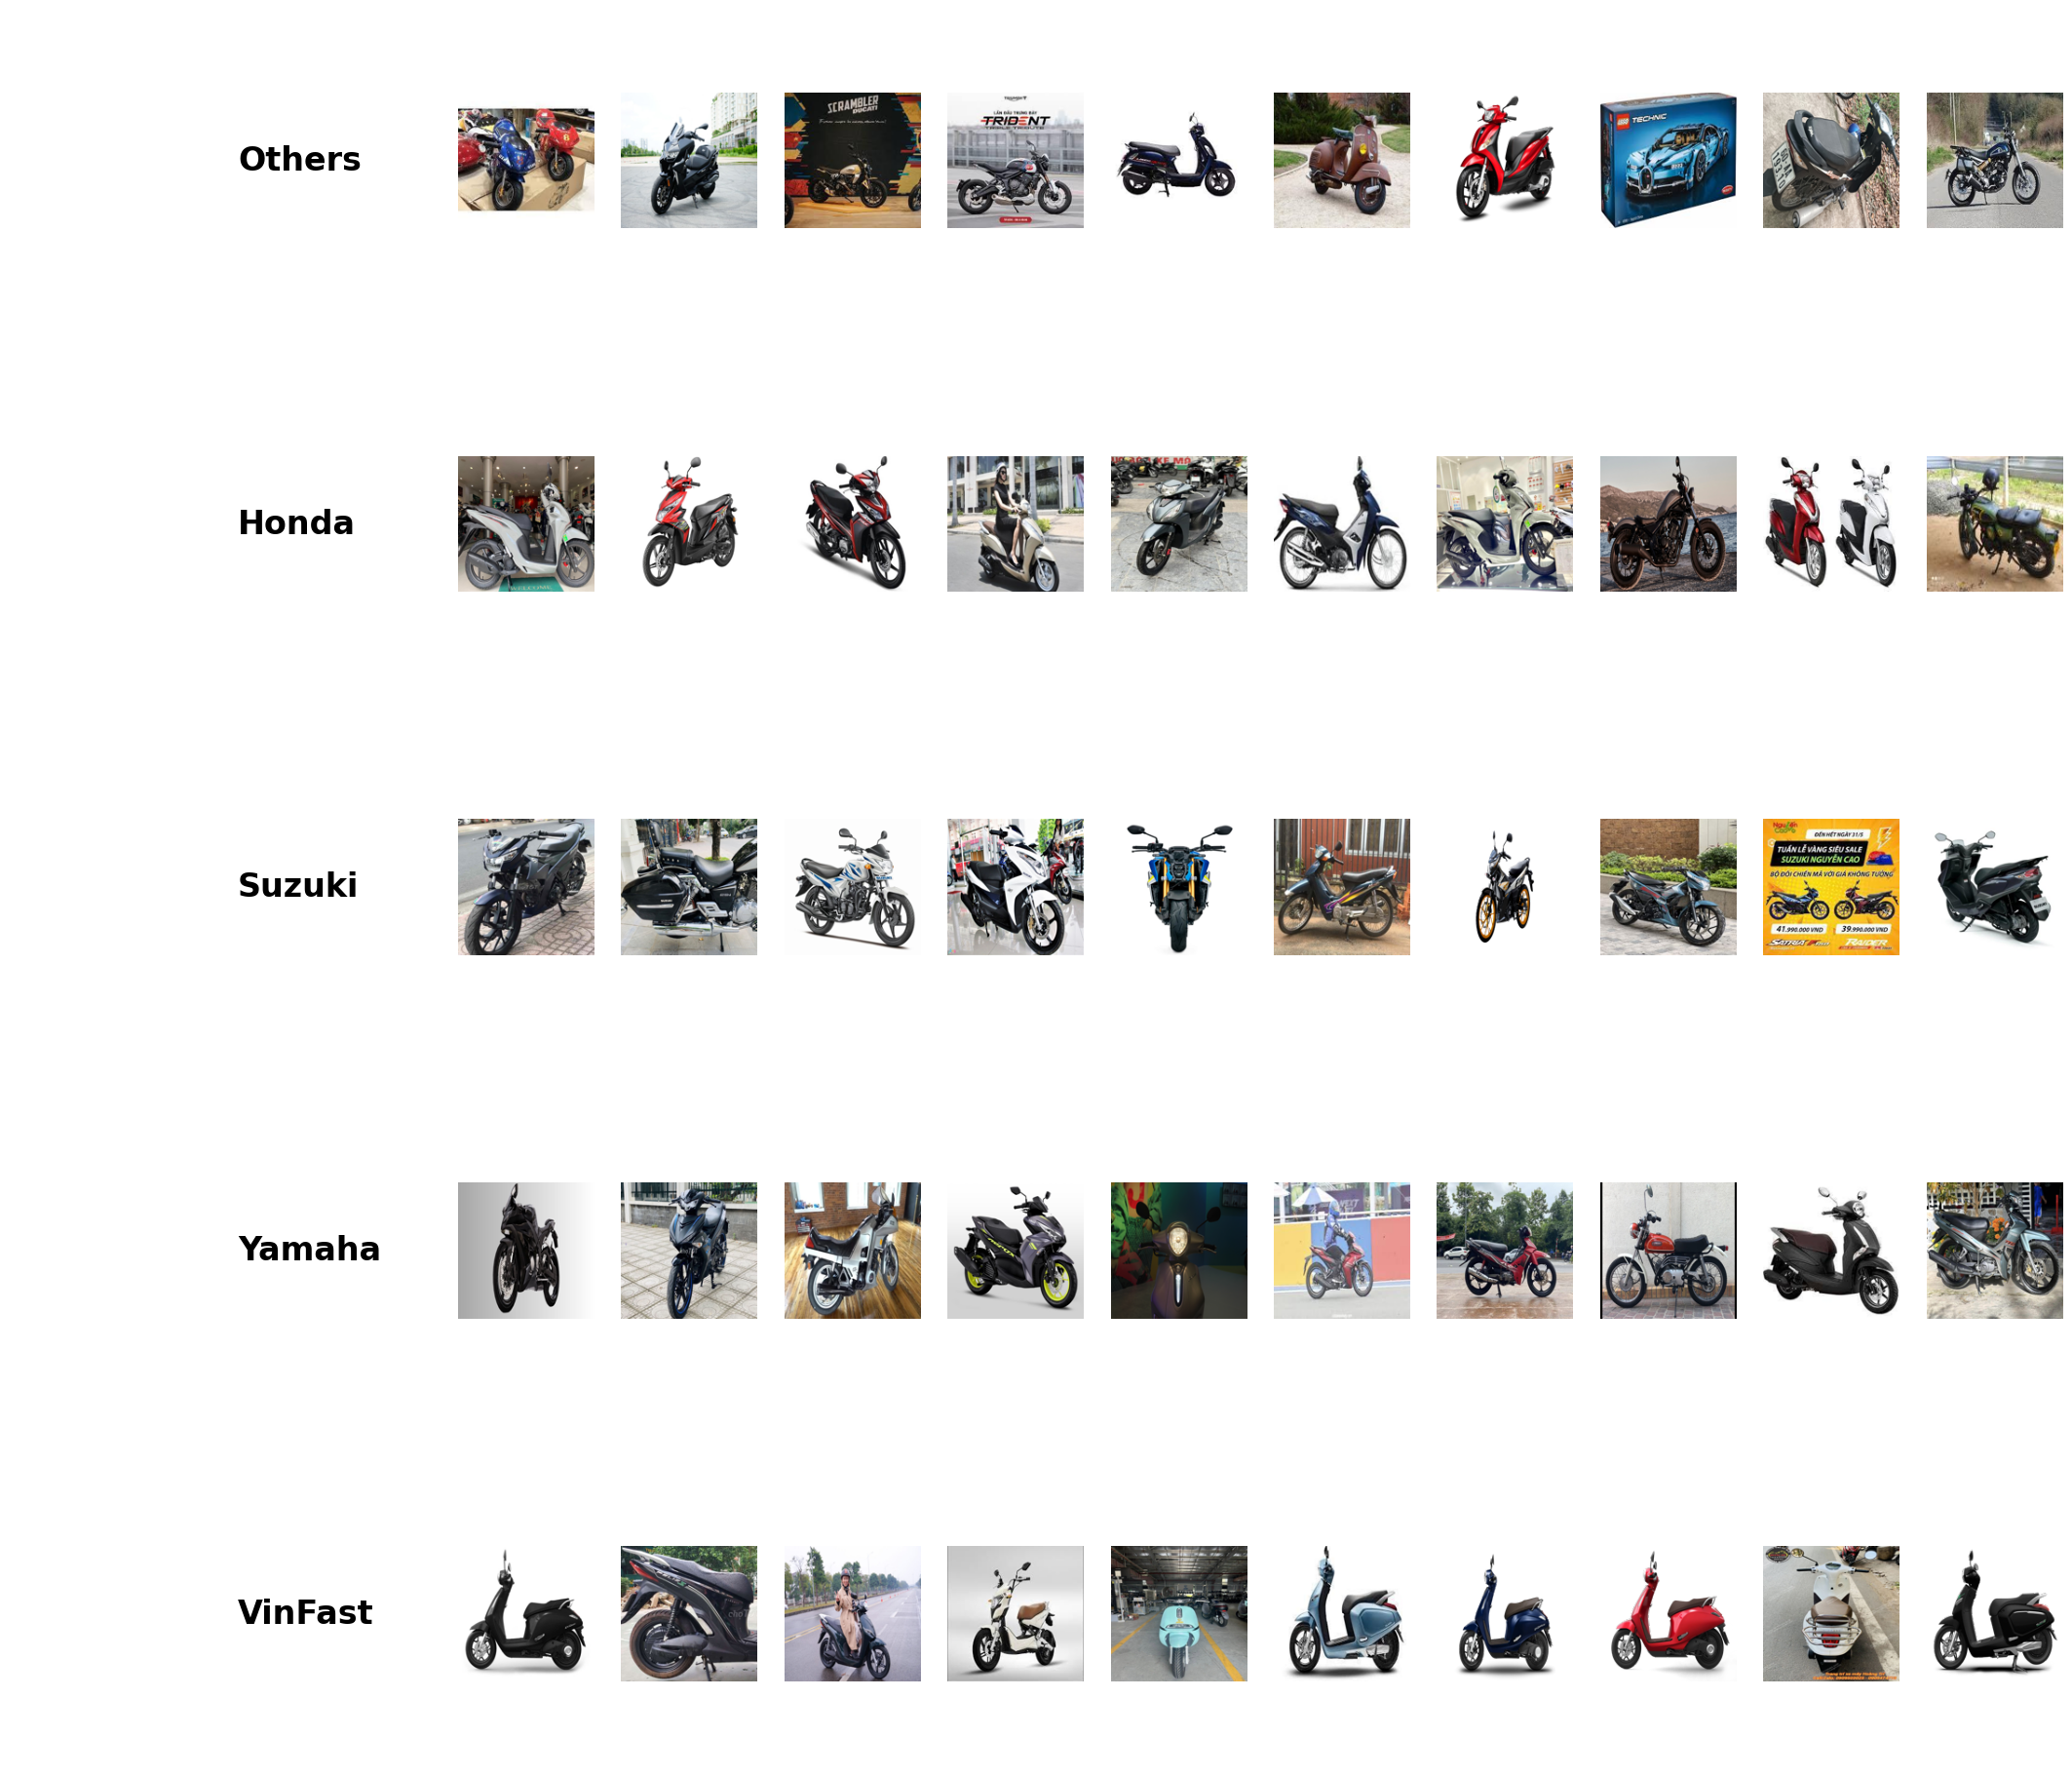

In [ ]:
# Plot images
print(base_dir)
categories = df["CategoryID"].unique()
fig, axes = plt.subplots(5, 11, figsize=(23.4, 23.4),sharey=True)
for category, row in zip(categories, range(5)):
    num_samples_per_row = 10
    images = df[df["CategoryID"] == category]["ImageFullPath"].tolist()
    plot_images_for_category(category, images,
                             row, fig, axes,
                             num_samples_per_row=num_samples_per_row,
                             base_dir=base_dir)
plt.show()